!["The Force Awakens"](http://www.thewrap.com/wp-content/uploads/2015/10/Star-Wars-the-Force-Awakens-Poster-Cropped.jpg)

# Star Wars Survey

##### The team at FiveThirtyEight used SurveyMonkey, an online survey tool, to survey Star Wars fans. This survay particularly interests in which film is the most popular one of the series. They received 835 responses in total. 

In [644]:
import pandas as pd
import numpy as np

In [645]:
# Some characters are not in the Python default utf-8 encoding, so we need to specify an encoding.
star_wars = pd.read_csv("star_wars.csv", encoding= "ISO-8859-1")

In [646]:
# How many data points (rows) x how many features (columns)
print star_wars.shape

(1187, 38)


### Sneak a peek at data

In [647]:
# Displays the column types, the number of values in the column and the size of the dataframe.
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [648]:
# Explore the data and look for strange values 
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire St

In [649]:
star_wars.columns

Index([                                                                                                                                 u'RespondentID',
                                                                                        u'Have you seen any of the 6 films in the Star Wars franchise?',
                                                                               u'Do you consider yourself to be a fan of the Star Wars film franchise?',
                                                                 u'Which of the following Star Wars films have you seen? Please select all that apply.',
                                                                                                                                          u'Unnamed: 4',
                                                                                                                                          u'Unnamed: 5',
                                                                                  

In [650]:
# Print the header & first row 
star_wars.iloc[0:1,:]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


In [651]:
star_wars.iloc[0,:].tolist()

[nan,
 u'Response',
 u'Response',
 u'Star Wars: Episode I  The Phantom Menace',
 u'Star Wars: Episode II  Attack of the Clones',
 u'Star Wars: Episode III  Revenge of the Sith',
 u'Star Wars: Episode IV  A New Hope',
 u'Star Wars: Episode V The Empire Strikes Back',
 u'Star Wars: Episode VI Return of the Jedi',
 u'Star Wars: Episode I  The Phantom Menace',
 u'Star Wars: Episode II  Attack of the Clones',
 u'Star Wars: Episode III  Revenge of the Sith',
 u'Star Wars: Episode IV  A New Hope',
 u'Star Wars: Episode V The Empire Strikes Back',
 u'Star Wars: Episode VI Return of the Jedi',
 u'Han Solo',
 u'Luke Skywalker',
 u'Princess Leia Organa',
 u'Anakin Skywalker',
 u'Obi Wan Kenobi',
 u'Emperor Palpatine',
 u'Darth Vader',
 u'Lando Calrissian',
 u'Boba Fett',
 u'C-3P0',
 u'R2 D2',
 u'Jar Jar Binks',
 u'Padme Amidala',
 u'Yoda',
 u'Response',
 u'Response',
 u'Response',
 u'Response',
 u'Response',
 u'Response',
 u'Response',
 u'Response',
 u'Response']

####  I saw there are many unspecified column names.  It is because *row 0* contains the check box options given by the surveyer which are important information to understand what each question is asking, and what the replies mean. I will rename the header row to make it more clear. 

### Data Wrangling
This dataset needs a lot of cleaning due to a lot of 'str' answers not easy for analysis, as well as many invalid rows with NaN values.

In [652]:
# Remove rows where RespondentID is NaN, since the second header row will be removed, I save the info of the header rows to 
# variable "header". 
header = star_wars.iloc[0:1,:]
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

##### Colume 1-2: those two questions are both Yes/No questions. 
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

In [653]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [654]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [655]:
# Both columns are currently string types (Yes or No). In order to make it a bit easier to analyze down the line, 
# convert each column to a Boolean
yes_no = {"Yes": True, "No": False}
have_you_seen_boolean = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
which_seen_boolean = star_wars["Which of the following Star Wars films have you seen? Please select all that apply."].map(yes_no)

##### Column 3-8: the next 6 columns represent a checkbox question, and several column names are as "Unnamed" which is quite confusing.
The respondent was asked the below question and then was able to check off a series of boxes indicating which movies they saw.
For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw it. If the value is NaN, the respondent either didn't answer, or didn't see the movie, but we'll assume that they didn't see the movie.

>Which of the following Star Wars films have you seen? Please select all that apply.


###### It's better to rename the column to have a more clear name instead of "Unnamed", also convert the answers to a Boolean.
I will use **seen_1** as the column name to indicate if the respondent saw Star Wars: Episode I The Phantom Menace; **seen_2** for Star Wars: Episode II Attack of the Clones, and so on.

In [656]:
# Create a column name map list
seen_maplist = {star_wars.columns[3]:"seen_1",star_wars.columns[4]:"seen_2",star_wars.columns[5]:"seen_3",
            star_wars.columns[6]:"seen_4",star_wars.columns[7]:"seen_5",star_wars.columns[8]:"seen_6"}

# Rename the selected columns 
star_wars = star_wars.rename(columns=seen_maplist)

In [657]:
# Map the answers to boolean values, if the anwer is NaN, we assume the respondent didn't see the movie
seen_1_map = {"Star Wars: Episode I  The Phantom Menace" : True, None : False}
seen_2_map = {"Star Wars: Episode II  Attack of the Clones" : True, None : False}
seen_3_map = {"Star Wars: Episode III  Revenge of the Sith" : True, None : False}
seen_4_map = {"Star Wars: Episode IV  A New Hope":True, None: False}
seen_5_map = {"Star Wars: Episode V The Empire Strikes Back":True, None : False}
seen_6_map = {"Star Wars: Episode VI Return of the Jedi":True, None: False}

# Convert the answers to boolean
star_wars["seen_1"] = star_wars["seen_1"].map(seen_1_map)
star_wars["seen_2"] = star_wars["seen_2"].map(seen_2_map)
star_wars["seen_3"] = star_wars["seen_3"].map(seen_3_map)
star_wars["seen_4"] = star_wars["seen_4"].map(seen_4_map)
star_wars["seen_5"] = star_wars["seen_5"].map(seen_5_map)
star_wars["seen_6"] = star_wars["seen_6"].map(seen_6_map)

##### Column 9-14: the next 6 columns ask the respondent to rank the Star Wars episodes I~VI in order of least to most favorite. 1 means the film was their most favorite, and 6 means it was their least favorite.

I will convert each column to a numeric type, then rename the columns so that they can tell what they're more easily.

In [658]:
# Since there are NaN values, we will convert the columns to a float type.
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [659]:
# Create a column name map list
ranking_maplist = {star_wars.columns[9]:"ranking_1",star_wars.columns[10]:"ranking_2",star_wars.columns[11]:"ranking_3",
                   star_wars.columns[12]:"ranking_4",star_wars.columns[13]:"ranking_5",star_wars.columns[14]:"ranking_6"}

# Rename the selected columns 
star_wars = star_wars.rename(columns=ranking_maplist)

##### Column 15-28: the next question asks the respondents how they view a specific character in terms of the level of favor. 

In [660]:
# We can check the given options after printing the header rows
header.iloc[0:1,15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


In [661]:
# Create a map list with a specific character name
name_maplist = {}
for index in range(15,29):
    name_maplist[star_wars.columns[index]]=header.iloc[0,index]
# Rename the column names directly with the character names for selecting the liking 
star_wars = star_wars.rename(columns=name_maplist)

### Finding the highest ranked movie

In [662]:
%matplotlib inline
import matplotlib.pyplot as plt

In [663]:
# Now, we can easily find out which episode is the highest ranking one. 
# compute the mean of each of the ranking columns

star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

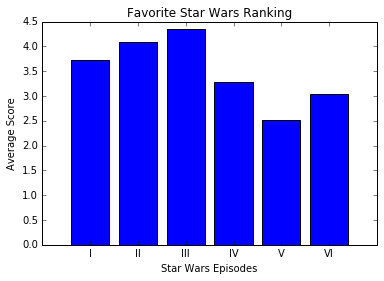

In [664]:
# Create a bar chart to show the average ranking score of each episode.
plt.bar(np.arange(6),star_wars[star_wars.columns[9:15]].mean(), align="center",
        tick_label=["I","II", "III", "IV","V", "VI"])
plt.xlabel("Star Wars Episodes")
plt.ylabel("Average Score")
plt.title("Favorite Star Wars Ranking")

Since a lower ranking is better, **Episode V The Empire Strikes Back** has the lowest mean which means it is the most favorite among the series.

### Finding the most seen movie

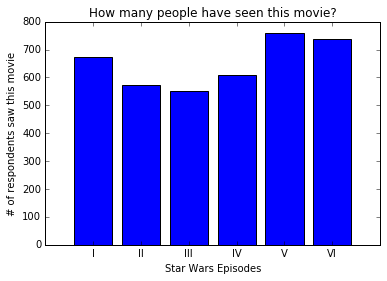

In [665]:
# Creat a bar chart to show how many people have seen each episode
plt.bar(range(6),star_wars[star_wars.columns[3:9]].sum(),
        tick_label=["I","II", "III", "IV","V", "VI"], align = "center")
plt.xlabel("Star Wars Episodes")
plt.ylabel("# of respondents saw this movie")
plt.title("How many people have seen this movie?")

It appears that better ranked episodes tend to be watched by more repondents as well. 
- The two **episode(V & VI)** with top 2 rankings have also been seen by more respondents as well. 
- Star war III is the least favorite one on average liking, and it's also been watched by the fewest people according to the response.

### Attachment to movie characters
- Which character is the most liked?
- Which character is the most disliked?
- Which character creates the most controversy? (split between dislikes and likes)

In [666]:
# Create a new dataframe as a counter of the voting results
character_series = star_wars[star_wars.columns[15]].value_counts()
character_df = pd.DataFrame({character_series.name:character_series.values},index=character_series.index)
for col in range(16,29):
    character_series = star_wars[star_wars.columns[col]].value_counts()
    character_df[character_series.name] = character_series.values

In [667]:
# Add a row to show the controversy(likes/dislikes), the closer the value is to 1, the more controversial this character is.
character_df.loc['controversy'] = (character_df.iloc[0]+character_df.iloc[1])/(character_df.iloc[4]+character_df.iloc[5])

In [668]:
# Show the voting summary by characters, display with only two decimal places
character_df.round(2)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Very favorably,610.00,552.00,547.00,269.00,591,213.00,310.00,236.00,248.00,474.00,562.00,204.00,207.00,605.00
Somewhat favorably,151.00,219.00,210.00,245.00,159,156.00,171.00,223.00,153.00,229.00,185.00,164.00,183.00,144.00
Neither favorably nor unfavorably (neutral),44.00,38.00,48.00,135.00,43,143.00,149.00,148.00,138.00,79.00,57.00,130.00,168.00,51.00
Unfamiliar (N/A),15.00,13.00,12.00,83.00,17,124.00,102.00,142.00,132.00,23.00,10.00,112.00,164.00,10.00
Somewhat unfavorably,8.00,6.00,8.00,52.00,8,110.00,84.00,63.00,96.00,15.00,10.00,109.00,58.00,8.00
Very unfavorably,1.00,3.00,6.00,39.00,7,68.00,10.00,8.00,45.00,7.00,6.00,102.00,34.00,8.00
controversy,84.56,85.67,54.07,5.65,50,2.07,5.12,6.46,2.84,31.95,46.69,1.74,4.24,46.81


1. **Han Solo** and **Yoda** are the top 2 charaters in terms of "Very favorably". They are pretty close in votes.
2. **Jar Jar Binks** and **Emperor Palpatineis** are the top 2 most disliked character. 
3. Also, **Jar Jar Binks** and **Emperor Palpatineis** are the top 2 controversial characters, they've got a lot of likes as well. 

### Exploring the data by binary segments

We've seen what the whole survey population thinks are the highest ranked movies. There are several columns that can segment the data into two groups, including:

- Do you consider yourself to be a fan of the Star Wars film franchise? -- True or False.
- Do you consider yourself to be a fan of the Star Trek franchise? -- Yes or No.
- Gender -- Male or Female.

We can further analyze by groups to see whether there are any different output.

#### Analysis by Gender

In [669]:
# Split the dataframe by gender
males = star_wars[star_wars["Gender"]=="Male"]
females = star_wars[star_wars["Gender"] =="Female"]

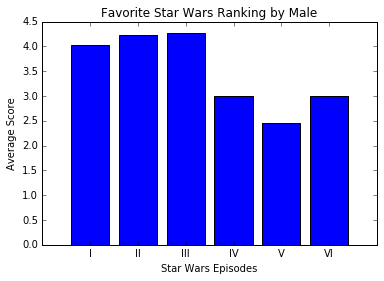

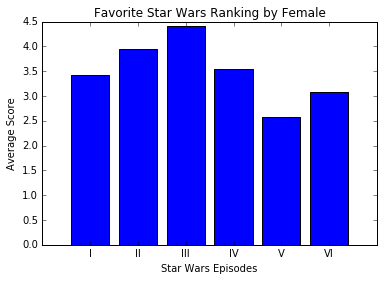

In [670]:
# Create bar charts to show the ranking by gender 
plt.bar(range(6), males[males.columns[9:15]].mean(),tick_label=["I","II", "III", "IV","V", "VI"], align = "center")
plt.xlabel("Star Wars Episodes")
plt.ylabel("Average Score")
plt.title("Favorite Star Wars Ranking by Male")
plt.show()
plt.bar(range(6), females[females.columns[9:15]].mean(),tick_label=["I","II", "III", "IV","V", "VI"], align = "center")
plt.xlabel("Star Wars Episodes")
plt.ylabel("Average Score")
plt.title("Favorite Star Wars Ranking by Female")
plt.show()

The plots show that male and female respondents have **similar liking scores** for star war movies.

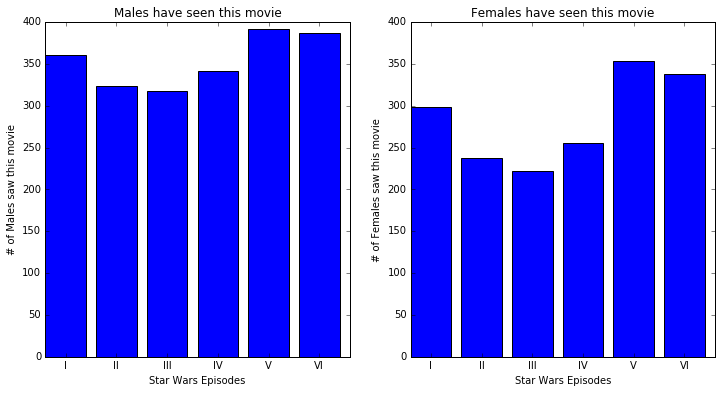

In [671]:
# Create bar charts to show the # of respondents saw each episode by gender 
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2,sharey=ax1)
ax1.bar(range(6),males[males.columns[3:9]].sum())
ax1.set_xlabel("Star Wars Episodes")
ax1.set_ylabel("# of Males saw this movie")
ax1.set_title("Males have seen this movie")
ax1.set_xticks(np.arange(6) + 0.4)
ax1.set_xticklabels(("I","II", "III", "IV","V", "VI"))
ax2.bar(range(6), females[females.columns[3:9]].sum())
ax2.set_xlabel("Star Wars Episodes")
ax2.set_ylabel("# of Females saw this movie")
ax2.set_title("Females have seen this movie")
ax2.set_xticks(np.arange(6) + 0.4)
ax2.set_xticklabels(("I","II", "III", "IV","V", "VI"))
plt.show()

- The plots show that for each episode, there are more males have seen it than females. 
- There are more than 300 male respondents have seen every star movies (I~VI). It indicates that the series is really popular amoung males.
- For females, there is a drop in viewers since episode I, and then it seems star wars regained its popularity from episode V,  as it shows that there is a jump in number of females who have watched the later released episode V & VI. 

#### Analysis by Fans vs Non-Fans

In [672]:
# How many respondents are fans? 
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [673]:
# Split the dataframe into two groups: fans and non_fans, ignore the rows with NaN values 
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=="Yes"]
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=="No"]

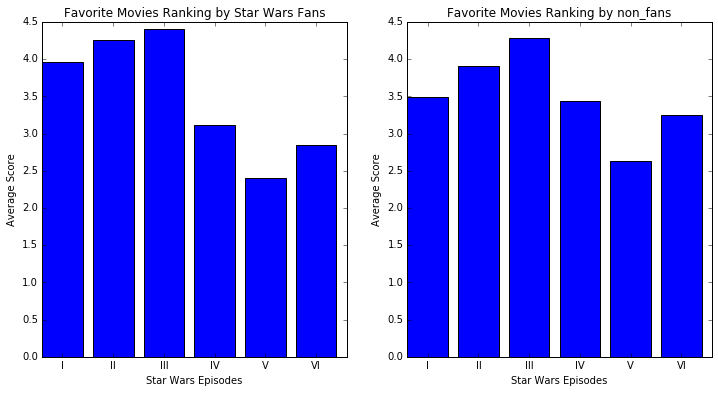

In [674]:
# Create bar charts to show the ranking by fans vs non_fans 
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2,sharey=ax1)
ax1.bar(range(6), fans[fans.columns[9:15]].mean())
ax1.set_xlabel("Star Wars Episodes")
ax1.set_ylabel("Average Score")
ax1.set_title("Favorite Movies Ranking by Star Wars Fans")
ax1.set_xticks(np.arange(6) + 0.4)
ax1.set_xticklabels(("I","II", "III", "IV","V", "VI"))
ax2.bar(range(6), non_fans[non_fans.columns[9:15]].mean())
ax2.set_xlabel("Star Wars Episodes")
ax2.set_ylabel("Average Score")
ax2.set_title("Favorite Movies Ranking by non_fans")
ax2.set_xticks(np.arange(6) + 0.4)
ax2.set_xticklabels(("I","II", "III", "IV","V", "VI"))
plt.show()

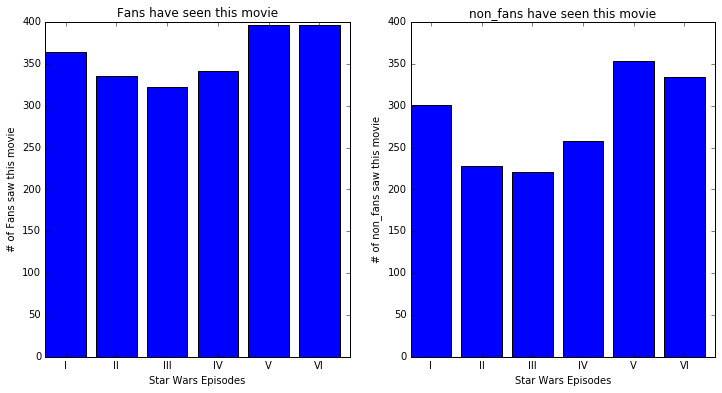

In [675]:
# Create bar charts to show the # of respondents saw each episode by gender 
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2,sharey=ax1)
ax1.bar(range(6),fans[fans.columns[3:9]].sum())
ax1.set_xlabel("Star Wars Episodes")
ax1.set_ylabel("# of Fans saw this movie")
ax1.set_title("Fans have seen this movie")
ax1.set_xticks(np.arange(6) + 0.4)
ax1.set_xticklabels(("I","II", "III", "IV","V", "VI"))
ax2.bar(range(6), non_fans[non_fans.columns[3:9]].sum())
ax2.set_xlabel("Star Wars Episodes")
ax2.set_ylabel("# of non_fans saw this movie")
ax2.set_title("non_fans have seen this movie")
ax2.set_xticks(np.arange(6) + 0.4)
ax2.set_xticklabels(("I","II", "III", "IV","V", "VI"))
plt.show()

In [676]:
ax.legend((rects1, rects2), ('fans', 'non_fans'),loc='upper center')
ax.legend((rects1, rects2), ('fans', 'non_fans'),bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

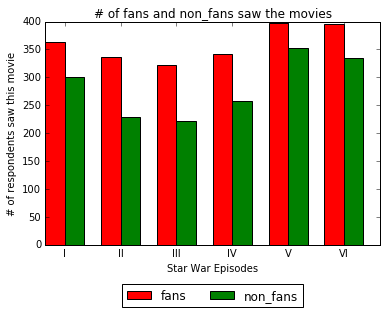

In [677]:
fig, ax = plt.subplots()
width = 0.35
rects1 = ax.bar(np.arange(6), fans[fans.columns[3:9]].sum(), width, color='r')
rects2 = ax.bar(np.arange(6) + width, non_fans[non_fans.columns[3:9]].sum(), width, color='g')
# add some text for labels, title and axes ticks
ax.set_xlabel('Star War Episodes')
ax.set_ylabel('# of respondents saw this movie')
ax.set_title('# of fans and non_fans saw the movies')
ax.set_xticks(np.arange(6) + width)
ax.set_xticklabels(("I","II", "III", "IV","V", "VI"))
ax.legend((rects1, rects2), ('fans', 'non_fans'), loc=9, bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

We know that 641 surveyees are non-fans and 427 respondents are fans. It is obvious that there are far more # of fans who saw the movies than non-fans. More than 80% of star wars fans have seen every episode regardless of the rating. However, for non-fans, it seems that their willingness to watch the movie would dramatically drop if the rating wasn't very good, as shown in the graph that for low-ranking episodes (II, III, IV), there were much less non_fans who saw those movies.  